# Recap

Nesta atividade vamos estabelecer uma conexão com o BigQuery para juntar duas tabelas e assim podermos fazer algumas análises envolvendo estatísticas descritivas.

Usaremos dados da tabela de municípios do Índice de Desenvolvimento da Educação Básica (IDEB) que pode ser acessada na íntegra com a query `SELECT * FROM basedosdados.br_inep_ideb.municipio LIMIT 100`, usaremos também os dados da tabela do Produto Interno Bruto (PIB) que pode ser acessada na íntegra com a query `SELECT * FROM basedosdados.br_ibge_pib.municipio LIMIT 100`. Para mais informações pode-se consultar os links [IDEB](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio) e [PIB](https://basedosdados.org/dataset/br-ibge-pib?bdm_table=municipio).

Usaremos apenas algumas colunas de cada tabela a fim de tentar ter uma primeira ideia de como estão o nível educacional e o PIB de alguns municípios.
###Integrantes Grupo 1:
* Gabriel Nunes Barbosa Nogueira
* Thiago Filipe Silva Pinto
* Jônatas Álefe Silva de Lima

Importando bibliotecas 

In [1]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd
import seaborn as sns 
import numpy as np

In [ ]:
# seu código


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Atividade 1: Crie um dataframe a partir de uma query, fazendo um join (qual?) das tabelas citadas.

Estamos interessados apenas nas colunas `ano, id_municipio, nota_saeb_matematica, nota_saeb_lingua_portuguesa, ideb` da tabela `basedosdados.br_inep_ideb.municipio` e nas colunas `ano, id_municipio, pib, impostos_liquidos` da tabela `basedosdados.br_ibge_pib.municipio`.

Lembre-se das boas práticas de SQL:
* comando em SQL escritos em maiúsculo e demais palavras em minúsculo
* renomear cada coluna quando necessário
* usar uma função de agregação (qual?) caso faça algum agrupamento

In [3]:
credencial=service_account.Credentials.from_service_account_file(
    '/content/drive/MyDrive/SIRIUS/Dados/Chaves/gabriel-sirius-e7b998baf018.json'
)

In [4]:
cliente=bigquery.Client(project=credencial.project_id, credentials=credencial)

Filtrando as colunas com os devidos ponteiros e fazendo o join inner

In [5]:
query="""SELECT
    ideb_municipio.ano,
    ideb_municipio.id_municipio,
    round(avg(nota_saeb_matematica)) as nota_saeb_matematica,
    round(avg(nota_saeb_lingua_portuguesa)) as nota_portugues,
    round(avg(ideb))as ideb,
    round(avg(pib))as pib,
    round(avg(impostos_liquidos)) as impostos_liquidos
    FROM basedosdados.br_inep_ideb.municipio AS ideb_municipio
    INNER JOIN basedosdados.br_ibge_pib.municipio AS pib_municipio
    ON ideb_municipio.id_municipio=pib_municipio.id_municipio
    group by
    ideb_municipio.ano,
    ideb_municipio.id_municipio"""

In [12]:
def query_sql(query):
  return cliente.query(
      f'''{query}''').to_dataframe()
query_sql(query)
df_ideb_pib=query_sql(query)      

# Fazendo a leitura das primeiras linhas

In [13]:
df_ideb_pib.head()

,ano,id_municipio,nota_saeb_matematica,nota_portugues,ideb,pib,impostos_liquidos
0,2005,1200328,180.0,174.0,2.0,46999881.0,803971.0
1,2005,1200336,182.0,171.0,3.0,113419065.0,2313903.0
2,2005,1200344,178.0,176.0,2.0,69983752.0,3552647.0
3,2005,1200351,190.0,176.0,2.0,106474207.0,1516781.0
4,2005,1200385,186.0,179.0,3.0,157048190.0,5287178.0


In [19]:
usuario=input("Qual query você quer fazer? ")
df_pib=query_sql(usuario)

Qual query você quer fazer? SELECT * FROM basedosdados.br_ibge_pib.municipio LIMIT 100


In [20]:
df_pib.head()

,ano,id_municipio,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,1100015,111290995,7549266,103741729,27013223,9376871,24651113,42700523
1,2003,1100015,143222381,10511613,132710768,41079095,12700905,32975861,45954907
2,2004,1100015,173990790,12219047,161771743,41413428,29963081,39089592,51305642
3,2005,1100015,167127355,12933774,154193581,41523789,13391368,39585165,59693260
4,2006,1100015,168805060,13668803,155136257,39469080,12885117,36398740,66383320


Quantos anos estão presentes no dataframe resultante? E quanto municípios?

In [ ]:
# seu código
df_ideb_pib.ano.unique()

array([2005, 2007, 2009, 2011, 2013, 2017, 2019, 2015, 2021])

In [ ]:
df_ideb_pib.isnull().sum()

ano                         0
id_municipio                0
nota_saeb_matematica    11528
nota_portugues          11528
ideb                     6107
pib                         0
impostos_liquidos           0
dtype: int64

In [18]:
df_ideb_pib.shape

(50124, 7)

Atividade 2: Calcule, por ano, as estatísticas descritivas que achar importante e tente extrair alguma conclusão sobre os dados.

In [ ]:
df_ideb_pib.groupby('ano')[['nota_saeb_matematica','nota_portugues','ideb','pib','impostos_liquidos']].agg([np.mean,np.min,np.max,np.std])

nota_saeb_matematica                          nota_portugues         \
                     mean   amin   amax        std           mean   amin   
ano                                                                        
2005           208.735043  137.0  295.0  19.282118     195.426236  130.0   
2007           214.312736  141.0  329.0  17.853857     197.988471  126.0   
2009           222.380901  158.0  319.0  21.064644     208.703925  143.0   
2011           226.173268  154.0  311.0  21.782573     211.261349  137.0   
2013           226.860626  146.0  301.0  22.389924     215.084971  137.0   
2015                  NaN    NaN    NaN        NaN            NaN    NaN   
2017           244.437230  172.0  332.0  19.327254     239.541007  156.0   
2019           249.175527  173.0  329.0  19.981864     242.388358  158.0   
2021                  NaN    NaN    NaN        NaN            NaN    NaN   

                            ideb                               pib             \
       amax        std      mean amin amax       std          mean       amin   
ano                                                                             
2005  267.0  16.980745  3.481605  1.0  6.0  0.808301  7.616670e+08  8180432.0   
2007  268.0  15.445453  3.793190  2.0  6.0  0.798488  7.616670e+08  8180432.0   
2009  285.0  17.797961  4.166757  2.0  7.0  0.879112  7.616670e+08  8180432.0   
2011  282.0  18.398946  4.387593  2.0  8.0  0.884665  7.616670e+08  8180432.0   
2013  287.0  19.730667  4.532387  2.0  7.0  0.944139  7.616670e+08  8180432.0   
2015    NaN        NaN  4.809814  2.0  8.0  0.907830  7.616670e+08  8180432.0   
2017  308.0  17.581167  4.576978  2.0  7.0  0.802615  7.615446e+08  8180432.0   
2019  317.0  18.283388  4.867183  2.0  8.0  0.795299  7.615446e+08  8180432.0   
2021    NaN        NaN       NaN  NaN  NaN       NaN  7.615446e+08  8180432.0   

                                 impostos_liquidos                          \
              amax           std              mean      amin          amax   
ano                                                                          
2005  4.682692e+11  7.733379e+09      1.096316e+08 -240733.0  8.479859e+10   
2007  4.682692e+11  7.733379e+09      1.096316e+08 -240733.0  8.479859e+10   
2009  4.682692e+11  7.733379e+09      1.096316e+08 -240733.0  8.479859e+10   
2011  4.682692e+11  7.733379e+09      1.096316e+08 -240733.0  8.479859e+10   
2013  4.682692e+11  7.733379e+09      1.096316e+08 -240733.0  8.479859e+10   
2015  4.682692e+11  7.733379e+09      1.096316e+08 -240733.0  8.479859e+10   
2017  4.682692e+11  7.732690e+09      1.096125e+08 -240733.0  8.479859e+10   
2019  4.682692e+11  7.732690e+09      1.096125e+08 -240733.0  8.479859e+10   
2021  4.682692e+11  7.732690e+09      1.096125e+08 -240733.0  8.479859e+10   

                    
               std  
ano                 
2005  1.431012e+09  
2007  1.431012e+09  
2009  1.431012e+09  
2011  1.431012e+09  
2013  1.431012e+09  
2015  1.431012e+09  
2017  1.430884e+09  
2019  1.430884e+09  
2021  1.430884e+09

In [ ]:
# seu código
df_ideb_pib.nota_portugues.describe()

count    38596.000000
mean       215.871437
std         24.757788
min        126.000000
25%        197.000000
50%        214.000000
75%        233.000000
max        317.000000
Name: nota_portugues, dtype: float64

In [ ]:
# seu código
df_ideb_pib.nota_saeb_matematica.describe()

count    38596.000000
mean       227.528500
std         24.470745
min        137.000000
25%        209.000000
50%        227.000000
75%        245.000000
max        332.000000
Name: nota_saeb_matematica, dtype: float64

In [ ]:
# seu código
df_ideb_pib.pib.describe()

count    5.012400e+04
mean     7.616262e+08
std      7.732532e+09
min      8.180432e+06
25%      4.898188e+07
50%      1.075636e+08
75%      2.838510e+08
max      4.682692e+11
Name: pib, dtype: float64

Atividade 3: Faça boxplots para ajudar na visualização dos dados. A interpretação dos boxplots está de acordo com as estatísticas calculadas? Alguma informação/interpretação nova pode ser obtida com os boxplots?

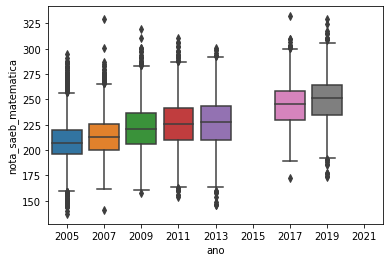

In [ ]:
# seu código
sns.boxplot(data=df_ideb_pib,x='ano',y='nota_saeb_matematica')

In [33]:
import plotly.express as pt
fig=pt.box(df_ideb_pib,x='ano',y='nota_saeb_matematica')
fig.show()

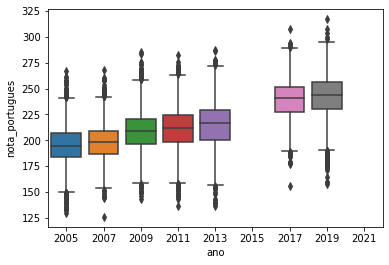

In [ ]:
# seu código
sns.boxplot(data=df_ideb_pib,x='ano',y='nota_portugues')

In [ ]:
df_ideb_pib

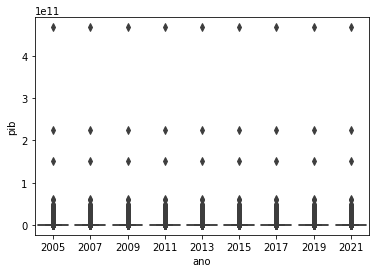

In [ ]:
# seu código
sns.boxplot(data=df_ideb_pib,x='ano',y='pib')

Pode-se observar um crescimento da média do IDEB de 2005 a 2015 com uma aparente estagnação de 2015 a 2019.

In [ ]:
df_ideb_pib['media_ideb']=df_ideb_pib.groupby('ano')['ideb'].transform('mean')

In [ ]:
df_ideb_pib['std_ideb']=df_ideb_pib.groupby('ano')['ideb'].transform('std')

In [ ]:
df_ideb_pib['var_ideb']=df_ideb_pib.groupby('ano')['ideb'].transform('var')

In [ ]:
df_ideb_pib.head()

,ano,id_municipio,nota_saeb_matematica,nota_portugues,ideb,pib,impostos_liquidos,media_ideb,std_ideb,var_ideb
0,2005,1200328,180.0,174.0,2.0,46999881.0,803971.0,3.481605,0.808301,0.65335
1,2005,1200336,182.0,171.0,3.0,113419065.0,2313903.0,3.481605,0.808301,0.65335
2,2005,1200344,178.0,176.0,2.0,69983752.0,3552647.0,3.481605,0.808301,0.65335
3,2005,1200351,190.0,176.0,2.0,106474207.0,1516781.0,3.481605,0.808301,0.65335
4,2005,1200385,186.0,179.0,3.0,157048190.0,5287178.0,3.481605,0.808301,0.65335


In [ ]:
import numpy as np

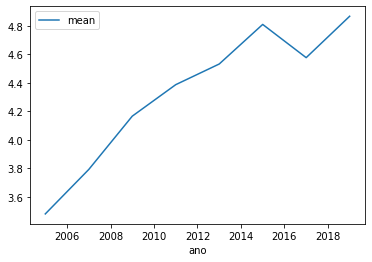

In [ ]:
df_ideb_pib.groupby('ano')['ideb'].agg([np.mean]).plot(kind='line')

In [ ]:
df_ideb_pib.head()

,ano,id_municipio,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos,media_ideb
0,2005,1200302,167.8,165.6,2.3,72818537,1207736,3.444452
1,2005,1200302,167.8,165.6,2.3,85351388,1332019,3.444452
2,2005,1200302,167.8,165.6,2.3,96864498,1355933,3.444452
3,2005,1200302,167.8,165.6,2.3,113395742,1651445,3.444452
4,2005,1200302,167.8,165.6,2.3,126198333,2095386,3.444452


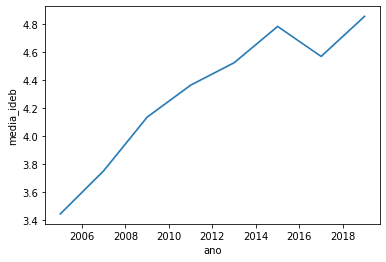

In [ ]:
# seu código
sns.lineplot(data=df_ideb_pib,x='ano',y='media_ideb')

In [ ]:
# seu código

In [ ]:
#enviando para o bigquery
project_id='gabriel-sirius'
table_id='IDEBPIB.df_ideb_pib'
df_ideb_pib.to_gbq(table_id,project_id=project_id)

1it [02:20, 140.46s/it]
